# Flight Delays and Cancellations  - EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.graph_objects as go #additional anaconda prompt installation
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio

import matplotlib as mpl
from matplotlib.gridspec import GridSpec

import matplotlib.patches as mpatches

In [2]:
sns.set(font_scale=1.5, rc={"figure.figsize": (14, 9)})
mpl.rc('figure', figsize=(14, 9))
font = {'weight' : 'semibold', 'size' : 15}
mpl.rc('font', **font)

## Importing data

In [3]:
airp=pd.read_csv('C:/Users/Sonja/Desktop/data/airports.csv')
airp


IATA_CODE                              AIRPORT  \
0         ABE  Lehigh Valley International Airport   
1         ABI             Abilene Regional Airport   
2         ABQ    Albuquerque International Sunport   
3         ABR            Aberdeen Regional Airport   
4         ABY   Southwest Georgia Regional Airport   
..        ...                                  ...   
317       WRG                     Wrangell Airport   
318       WYS               Westerly State Airport   
319       XNA  Northwest Arkansas Regional Airport   
320       YAK                      Yakutat Airport   
321       YUM           Yuma International Airport   

                               CITY STATE COUNTRY  LATITUDE  LONGITUDE  
0                         Allentown    PA     USA  40.65236  -75.44040  
1                           Abilene    TX     USA  32.41132  -99.68190  
2                       Albuquerque    NM     USA  35.04022 -106.60919  
3                          Aberdeen    SD     USA  45.44906  -98.42183  
4                            Albany    GA     USA  31.53552  -84.19447  
..                              ...   ...     ...       ...        ...  
317                        Wrangell    AK     USA  56.48433 -132.36982  
318                West Yellowstone    MT     USA  44.68840 -111.11764  
319  Fayetteville/Springdale/Rogers    AR     USA  36.28187  -94.30681  
320                         Yakutat    AK     USA  59.50336 -139.66023  
321                            Yuma    AZ     USA  32.65658 -114.60597  

[322 rows x 7 columns]

In [4]:
airl=pd.read_csv('C:/Users/Sonja/Desktop/data/airlines.csv')
airl

IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America

In [5]:
flights=pd.read_csv('C:/Users/Sonja/Downloads/flights.csv',low_memory=False)

In [6]:
def downcast_dtypes(df): #tryin to reduce memory usage
    start=df.memory_usage(deep=True).sum() / 1024**2
    float_cols=[c for c in df if df[c].dtype=='float64']
    int_cols=[c for c in df if df[c].dtype in ['int64','int32']]
    df[float_cols]=df[float_cols].astype(np.float32)
    df[int_cols]=df[int_cols].astype(np.int16)
    end=df.memory_usage(deep=True).sum() / 1024**2
    saved=(start-end)/start*100
    print(f"Saved {saved:.2f}%")
    return df

In [7]:
flights=downcast_dtypes(flights)


Saved 25.69%


In [8]:
flights

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0                  ANC                 SEA                    5  ...   
1                  LAX                 PBI                   10  ...   
2                  SFO                 CLT                   20  ...   
3                  LAX                 MIA                   20  ...   
4                  SEA                 ANC                   25  ...   
...                ...                 ...                  ...  ...   
5819074            LAX                 BOS                 2359  ...   
5819075            JFK                 PSE                 2359  ...   
5819076            JFK                 SJU                 2359  ...   
5819077            MCO                 SJU                 2359  ...   
5819078            JFK                 BQN                 2359  ...   

         ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
0               408.0          -22.0         0          0   
1               741.0           -9.0         0          0   
2               811.0            5.0         0          0   
3               756.0           -9.0         0          0   
4               259.0          -21.0         0          0   
...               ...            ...       ...        ...   
5819074         753.0          -26.0         0          0   
5819075         430.0          -16.0         0          0   
5819076         432.0           -8.0         0          0   
5819077         330.0          -10.0         0          0   
5819078         442.0            2.0         0          0   

         CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0                        NaN               NaN             NaN            NaN   
1                        NaN               NaN             NaN            NaN   
2                        NaN               NaN             NaN            NaN   
3                        NaN               NaN             NaN            NaN   
4                        NaN               NaN             NaN            NaN   
...                      ...               ...             ...            ...   
5819074                  NaN               NaN             NaN            NaN   
5819075                  NaN               NaN             NaN            NaN   
5819076                  NaN               NaN             NaN            NaN   
5819077                  NaN               NaN             NaN            NaN   
5819078                  NaN               NaN             NaN            NaN   

         LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0                        NaN            NaN  
1                        NaN            NaN  
2                        NaN            NaN  
3                        NaN            NaN  
4                        NaN            NaN  
...                      ...            ...  
5819074                  NaN            NaN  
5819075                  NaN            NaN  
5819076                  NaN            NaN  
5819077                  NaN            NaN  
5819078

## Null values and deleting columns which are not important to analysis

In [9]:
airp.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [10]:
airl.isnull().sum()

IATA_CODE    0
AIRLINE      0
dtype: int64

In [11]:
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [12]:
#delete columns taxi in, taxi out, wheels on, and wheels off not important to analysis) and 
#everything after cancelation reason(too much missing values)

In [13]:
flights.drop('WHEELS_ON',
  axis=1, inplace=True)
flights.drop('WHEELS_OFF',
  axis=1, inplace=True)
flights.drop('TAXI_IN',
  axis=1, inplace=True)
flights.drop('TAXI_OUT',
  axis=1, inplace=True)
flights.drop('CANCELLATION_REASON',
  axis=1, inplace=True)
flights.drop('AIR_SYSTEM_DELAY',
  axis=1, inplace=True)
flights.drop('SECURITY_DELAY',
  axis=1, inplace=True)
flights.drop('AIRLINE_DELAY',
  axis=1, inplace=True)
flights.drop('LATE_AIRCRAFT_DELAY',
  axis=1, inplace=True)
flights.drop('WEATHER_DELAY',
  axis=1, inplace=True)

In [14]:
flights.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER             14721
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
dtype: int64

In [15]:
(flights['YEAR']==2015).all() # all flights are from 2015 - it can't give us any new information 

True

In [16]:
flights.drop('YEAR',
  axis=1, inplace=True)

In [17]:
n = flights.nunique(axis=0)
  
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          628
DESTINATION_AIRPORT     629
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
dtype: int64


In [18]:
(airp['COUNTRY']=='USA').all() # all flights are from USA - it can't give us any new information

True

In [19]:
airp.drop('COUNTRY',
  axis=1, inplace=True)

In [20]:
# trying to reduce memory in these files as well
airp=downcast_dtypes(airp)
airl=downcast_dtypes(airl)

Saved 2.72%
Saved 0.00%


## Exploratory Data Analysis

In [21]:
no_depdelayed=flights['DEPARTURE_DELAY'].apply(lambda s: 1 if s>=15 else 0)
no_arrdelayed=flights['ARRIVAL_DELAY'].apply(lambda s: 1 if s>=15 else 0)
print('Statistic for flights: ')
print('-Total no of flights: '+str(len(flights)))
print('-No of cancelled flights: '+str(sum(flights['CANCELLED'])))
print('-No of departure delayed flights: '+str(sum(no_depdelayed)))
print('-No of arrival delayed flights: '+str(sum(no_arrdelayed)))
print('-No of diverted flights: '+str(sum(flights['DIVERTED'])))
print('-Percentage of cancelled: '+str((sum(flights['CANCELLED'])*1.0/len(flights))*100)+"%")
print('-Percentage of departure delayed: '+str((sum(no_depdelayed)*1.0/len(flights))*100)+"%")
print('-Percentage of arrival delayed: '+str((sum(no_arrdelayed)*1.0/len(flights))*100)+"%")
print('-Percentage of diverted: '+str((sum(flights['DIVERTED'])*1.0/len(flights))*100)+"%")

      

Statistic for flights: 
-Total no of flights: 5819079
-No of cancelled flights: 89884
-No of departure delayed flights: 1057554
-No of arrival delayed flights: 1063439
-No of diverted flights: 15187
-Percentage of cancelled: 1.5446430612129514%
-Percentage of departure delayed: 18.173906901762287%
-Percentage of arrival delayed: 18.275039744261935%
-Percentage of diverted: 0.26098631759424473%


In [22]:
for dataset in flights:
    flights.loc[flights['ARRIVAL_DELAY'] < 15, 'Status'] = 0
    flights.loc[flights['ARRIVAL_DELAY']  >= 15, 'Status'] = 1
    flights.loc[flights['DIVERTED'] == 1, 'Status'] = 2
    flights.loc[flights['CANCELLED'] == 1, 'Status'] = 3
    

In [23]:
f,ax=plt.subplots(1,2)

colors=['lightgreen','cadetblue','coral','grey']
flights['Status'].value_counts().plot.pie(explode=[0.05,0.05,0,0],colors=colors,autopct='%1.1f%%',ax=ax[0],
                                          textprops={'fontsize': 10})
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = flights['Status'].value_counts().index, data=flights,ax=ax[1],palette=colors)
ax[1].set_title('Status')
plt.savefig('1.png', dpi = 70)
plt.show()

print('Status represents wether the flight was on time (0),delayed (1), diverted (2), or cancelled (3)')


Status represents wether the flight was on time (0),delayed (1), diverted (2), or cancelled (3)


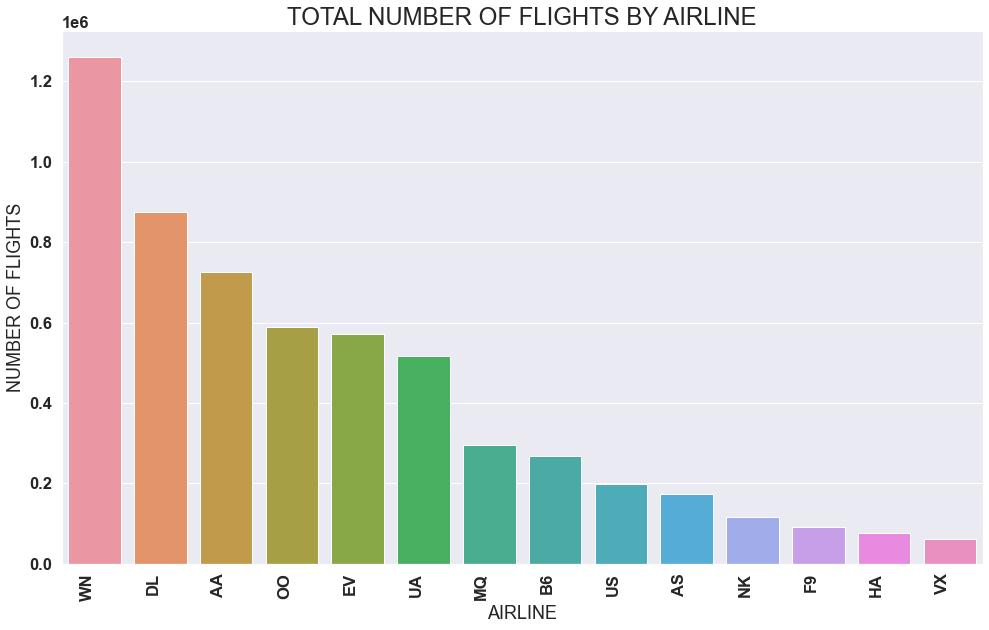

In [24]:
plt.figure(figsize=(14, 9))
axis = sns.countplot(x=flights['AIRLINE'], data=flights, order=flights['AIRLINE'].value_counts().iloc[0:14].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.savefig('2.png', dpi = 70)
plt.show()

In [25]:
plt.figure()

axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data=flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[0:14].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY ORFIGIN AIRPORT', fontsize=24)
plt.xlabel('ORIGIN AIRPORT', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.savefig('3.png', dpi = 70)
plt.show()

In [26]:
df_Org = pd.DataFrame(flights['ORIGIN_AIRPORT'].value_counts().reset_index().values, 
                      columns=["ORIGIN_AIRPORT", "AggregateOrigin"])

df_Org = df_Org.sort_values('AggregateOrigin',ascending=False).head(10)
df_Org = df_Org.sort_values('AggregateOrigin',ascending=True)

fig = px.bar(df_Org, x='AggregateOrigin', y='ORIGIN_AIRPORT', text='AggregateOrigin', orientation ='h',opacity = 0.8)
fig.update_traces(texttemplate='%{text:.5s}', textposition='outside')
fig.update_layout(uniformtext_minsize=4, uniformtext_mode='hide', title_text='Top 10 Airports w.r.t Arrivals', title_x = 0.5)
fig.add_annotation( x= 30000, y='ATL', 
                   text="World's Busiest Airport <br> <b>Hartsfield–Jackson Atlanta International Airport<b>",
                   showarrow=True,font=dict( family="Arial", size=12, color="#ffffff" ), 
                   align="center", arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor="#636363", ax=-30, ay=80, 
                   bordercolor="#c7c7c7", borderwidth=2, borderpad=4, bgcolor="#32a848", opacity=0.8)

fig.write_image('4.png')
fig.show()

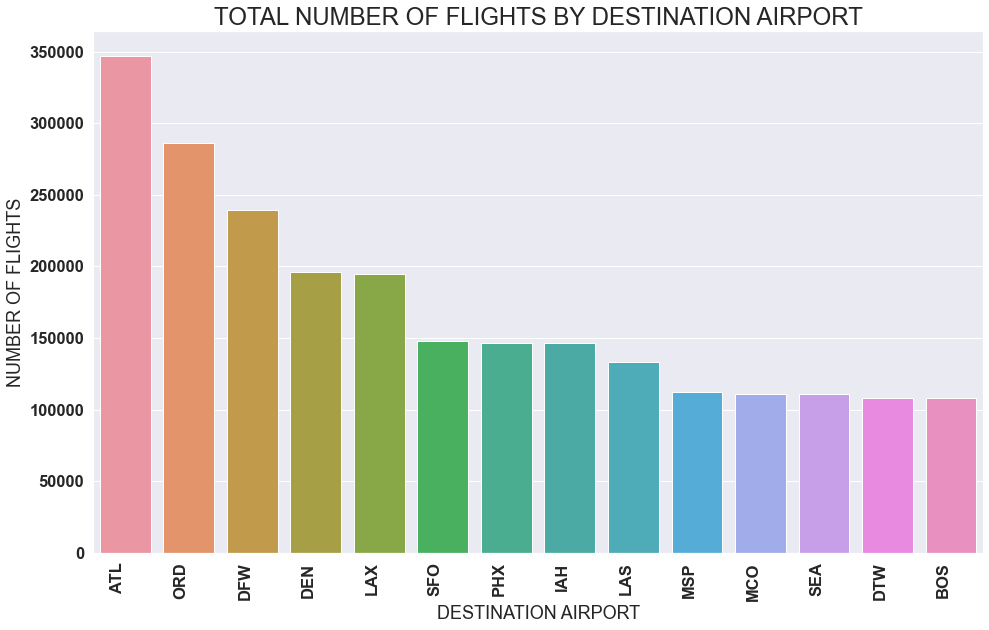

In [27]:
plt.figure()

axis = sns.countplot(x=flights['DESTINATION_AIRPORT'], data=flights, 
                     order=flights['DESTINATION_AIRPORT'].value_counts().iloc[0:14].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY DESTINATION AIRPORT', fontsize=24)
plt.xlabel('DESTINATION AIRPORT', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.savefig('5.png', dpi = 70)
plt.show()

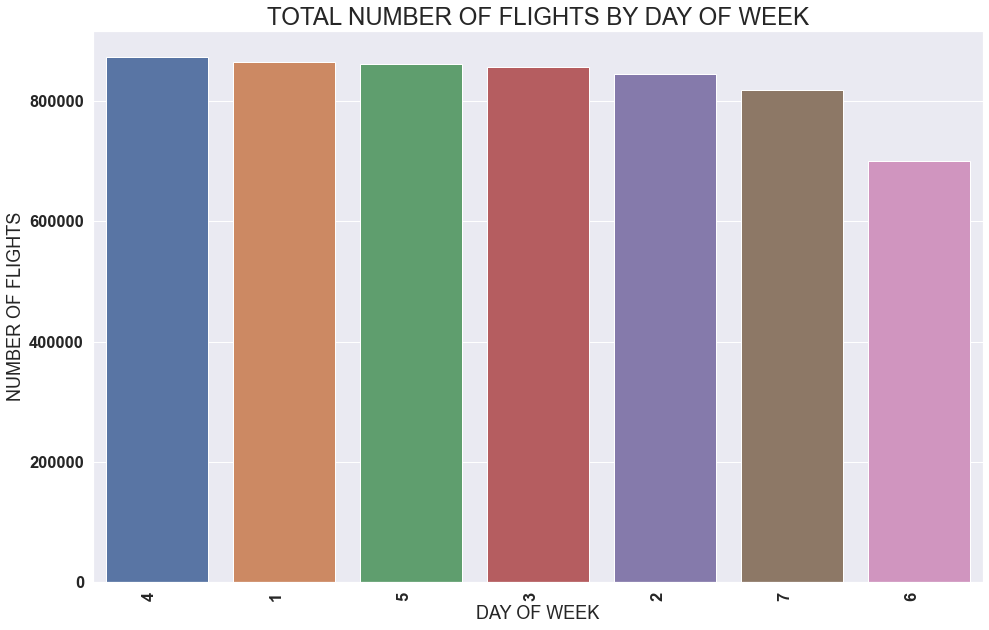

In [28]:
plt.figure()

axis = sns.countplot(x=flights['DAY_OF_WEEK'], data=flights, order=flights['DAY_OF_WEEK'].value_counts().iloc[0:7].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY DAY OF WEEK', fontsize=24)
plt.xlabel('DAY OF WEEK', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.savefig('6.png', dpi = 70)
plt.show()

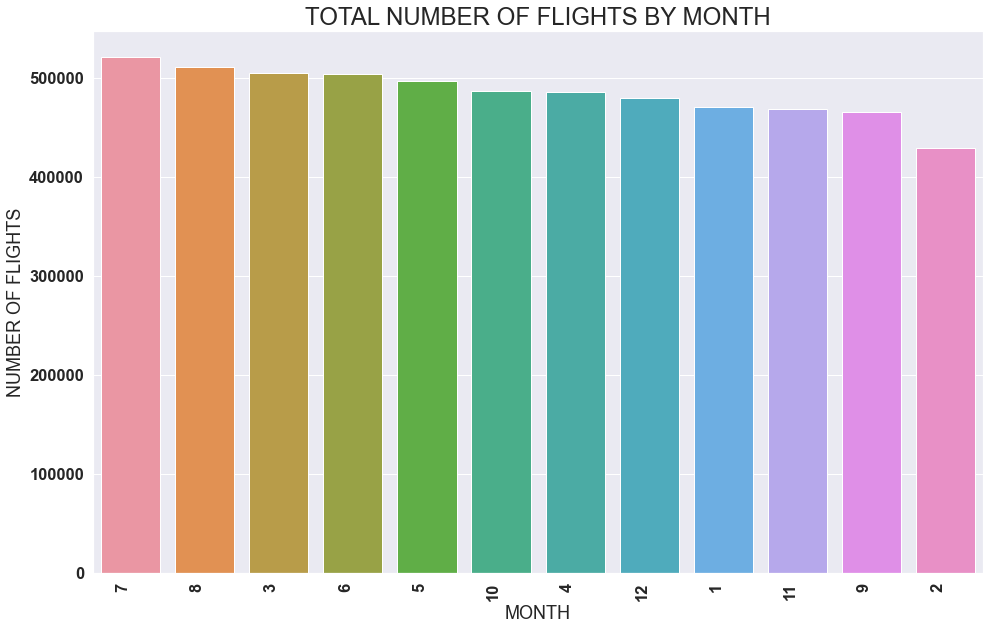

In [29]:
plt.figure()

axis = sns.countplot(x=flights['MONTH'], data=flights, order=flights['MONTH'].value_counts().iloc[0:12].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY MONTH', fontsize=24)
plt.xlabel('MONTH', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.savefig('7.png', dpi = 70)
plt.show()

In [30]:
flights['FlightType'] = 'Short Haul'
flights.loc[(flights['DISTANCE'] >= 600) & (flights['DISTANCE'] <= 2600), 'FlightType'] = 'Medium Haul'
flights.loc[(flights['DISTANCE'] > 2600), 'FlightType'] = 'Long Haul'

df_flight = pd.DataFrame(flights['FlightType'].value_counts().reset_index().values, columns=["FlightType", "AggregateType"])
labels = ["Short Haul","Medium Haul","Long Haul"]
value = [df_flight['AggregateType'][0],df_flight['AggregateType'][1],df_flight['AggregateType'][2]]
colors=['lightcyan','cyan','royalblue']
figs = go.Figure(data=[go.Pie(labels=labels, values=value, pull=[0, 0, 0.3],textinfo = 'label+percent', hole = 0.3,
                              hoverinfo="label+percent")])

figs.update_traces( textinfo='label + percent', textfont_size=10)
figs.update_layout(
    title_text="<b>Flights By Distance<b> <i>(in Miles)<i>",title_x = 0.5, font_size = 12,legend=dict(x=.75, y=0.55),
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='<b>Distance<b>', x=0.5, y=0.5, font_size=11, showarrow=False)]
)

figs.write_image('8.png')
figs.show()


In [31]:
cities = flights[['AIRLINE', 'DESTINATION_AIRPORT', 'ARRIVAL_DELAY']]
cities = cities.groupby(['AIRLINE', 'DESTINATION_AIRPORT']).mean().reset_index()

In [32]:
cities.AIRLINE.value_counts()

OO    383
EV    341
DL    299
MQ    243
AA    187
UA    179
WN    172
AS    130
B6    125
F9    112
US     79
NK     66
VX     38
HA     34
Name: AIRLINE, dtype: int64

In [33]:
cities_airline = cities.AIRLINE.value_counts().rename_axis('AIRLINE').reset_index(name='NUMBER_CITIES')
cities_airline.head(18)

AIRLINE  NUMBER_CITIES
0       OO            383
1       EV            341
2       DL            299
3       MQ            243
4       AA            187
5       UA            179
6       WN            172
7       AS            130
8       B6            125
9       F9            112
10      US             79
11      NK             66
12      VX             38
13      HA             34

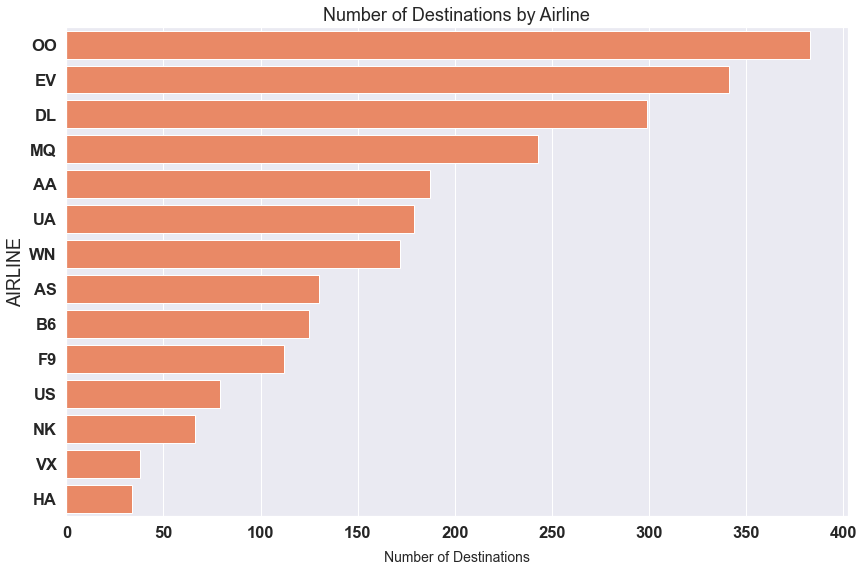

In [34]:
sns.set_style('darkgrid')

fig = plt.figure(1)
ax = sns.barplot(x="NUMBER_CITIES", y="AIRLINE", data=cities_airline, palette=['coral'])
plt.title('Number of Destinations by Airline', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.savefig('9.png', dpi = 70)
plt.show()

In [35]:
dis=flights['DISTANCE'].to_list()
max(dis)

4983

In [36]:
min(dis)

21

In [37]:
flights.loc[(flights['FlightType']=='Medium Haul')]
#JFK-BQN

MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0            1    1            4      AS             98      N407AS   
1            1    1            4      AA           2336      N3KUAA   
2            1    1            4      US            840      N171US   
3            1    1            4      AA            258      N3HYAA   
4            1    1            4      AS            135      N527AS   
...        ...  ...          ...     ...            ...         ...   
5819073     12   31            4      B6             66      N655JB   
5819075     12   31            4      B6            745      N828JB   
5819076     12   31            4      B6           1503      N913JB   
5819077     12   31            4      B6            333      N527JB   
5819078     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0                  ANC                 SEA                    5   
1                  LAX                 PBI                   10   
2                  SFO                 CLT                   20   
3                  LAX                 MIA                   20   
4                  SEA                 ANC                   25   
...                ...                 ...                  ...   
5819073            ABQ                 JFK                 2359   
5819075            JFK                 PSE                 2359   
5819076            JFK                 SJU                 2359   
5819077            MCO                 SJU                 2359   
5819078            JFK                 BQN                 2359   

         DEPARTURE_TIME  ...  ELAPSED_TIME  AIR_TIME  DISTANCE  \
0                2354.0  ...         194.0     169.0      1448   
1                   2.0  ...         279.0     263.0      2330   
2                  18.0  ...         293.0     266.0      2296   
3                  15.0  ...         281.0     258.0      2342   
4                  24.0  ...         215.0     199.0      1448   
...                 ...  ...           ...       ...       ...   
5819073            15.0  ...         214.0     190.0      1826   
5819075          2355.0  ...         215.0     195.0      1617   
5819076          2350.0  ...         222.0     197.0      1598   
5819077          2353.0  ...         157.0     144.0      1189   
5819078            14.0  ...         208.0     189.0      1576   

         SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
0                      430         408.0          -22.0         0          0   
1                      750         741.0           -9.0         0          0   
2                      806         811.0            5.0         0          0   
3                      805         756.0           -9.0         0          0   
4                      320         259.0          -21.0         0          0   
...                    ...           ...            ...       ...        ...   
5819073                546         549.0            3.0         0          0   
5819075                446         430.0          -16.0         0          0   
5819076                440         432.0           -8.0         0          0   
5819077                340         330.0          -10.0         0          0   
5819078                440         442.0            2.0         0          0   

         Status   FlightType  
0           0.0  Medium Haul  
1           0.0  Medium Haul  
2           0.0  Medium Haul  
3           0.0  Medium Haul  
4           0.0  Medium Haul  
...         ...          ...  
5819073     0.0  Medium Haul  
5819075     0.0  Medium Haul  
5819076     0.0  Medium Haul  
5819077     0.0  Medium Haul  
5819078     0.0  Medium Haul  

[3117814 rows x 22 columns]

In [38]:
flights.loc[(flights['DISTANCE']==4983)]
#HNL-JFK

MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
2253         1    1            4      DL            420      N178DN   
2960         1    1            4      HA             51      N381HA   
9394         1    1            4      HA             50      N390HA   
10134        1    1            4      DL           1059      N178DN   
17541        1    2            5      DL            420       N1602   
...        ...  ...          ...     ...            ...         ...   
5793884     12   30            3      HA             51      N384HA   
5800539     12   30            3      HA             50      N381HA   
5801814     12   30            3      DL           2196      N394DL   
5810144     12   31            4      HA             51      N381HA   
5815725     12   31            4      HA             50      N396HA   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
2253               JFK                 HNL                  845   
2960               JFK                 HNL                  935   
9394               HNL                 JFK                 1625   
10134              HNL                 JFK                 1715   
17541              JFK                 HNL                  845   
...                ...                 ...                  ...   
5793884            JFK                 HNL                  925   
5800539            HNL                 JFK                 1620   
5801814            HNL                 JFK                 1740   
5810144            JFK                 HNL                 1000   
5815725            HNL                 JFK                 1620   

         DEPARTURE_TIME  ...  ELAPSED_TIME  AIR_TIME  DISTANCE  \
2253              846.0  ...         711.0     669.0      4983   
2960              933.0  ...         660.0     639.0      4983   
9394             1632.0  ...         566.0     543.0      4983   
10134            1705.0  ...         575.0     546.0      4983   
17541             849.0  ...         706.0     664.0      4983   
...                 ...  ...           ...       ...       ...   
5793884           918.0  ...         678.0     649.0      4983   
5800539          1614.0  ...         545.0     518.0      4983   
5801814          1744.0  ...         567.0     528.0      4983   
5810144           958.0  ...         674.0     652.0      4983   
5815725          1626.0  ...         544.0     518.0      4983   

         SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
2253                  1543        1537.0           -6.0         0          0   
2960                  1550        1533.0          -17.0         0          0   
9394                   655         658.0            3.0         0          0   
10134                  800         740.0          -20.0         0          0   
17541                 1543        1535.0           -8.0         0          0   
...                    ...           ...            ...       ...        ...   
5793884               1545        1536.0           -9.0         0          0   
5800539                655         619.0          -36.0         0          0   
5801814                825         811.0          -14.0         0          0   
5810144               1620        1612.0           -8.0         0          0   
5815725                655         630.0          -25.0         0          0   

         Status  FlightType  
2253        0.0   Long Haul  
2960        0.0   Long Haul  
9394        0.0   Long Haul  
10134       0.0   Long Haul  
17541       0.0   Long Haul  
...         ...         ...  
5793884     0.0   Long Haul  
5800539     0.0   Long Haul  
5801814     0.0   Long Haul  
5810144     0.0   Long Haul  
5815725     0.0   Long Haul  

[682 rows x 22 columns]

In [39]:
flights.loc[(flights['DISTANCE']==21)]
#EWR-JFK

MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
1714902      4   20            1      AA           1297      N3BHAA   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
1714902            EWR                 JFK                 1040   

         DEPARTURE_TIME  ...  ELAPSED_TIME  AIR_TIME  DISTANCE  \
1714902          1232.0  ...           NaN       NaN        21   

         SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
1714902               1107           NaN            NaN         0          1   

         Status  FlightType  
1714902     3.0  Short Haul  

[1 rows x 22 columns]

In [40]:
airp.loc[(airp['IATA_CODE']=='HNL')]

IATA_CODE                         AIRPORT      CITY STATE   LATITUDE  \
141       HNL  Honolulu International Airport  Honolulu    HI  21.318689   

      LONGITUDE  
141 -157.922409

In [41]:
airp.loc[(airp['IATA_CODE']=='JFK')]

IATA_CODE                                            AIRPORT      CITY  \
166       JFK  John F. Kennedy International Airport (New Yor...  New York   

    STATE   LATITUDE  LONGITUDE  
166    NY  40.639751 -73.778931

In [42]:
airp.loc[(airp['IATA_CODE']=='EWR')]

IATA_CODE                               AIRPORT    CITY STATE   LATITUDE  \
106       EWR  Newark Liberty International Airport  Newark    NJ  40.692501   

     LONGITUDE  
106 -74.168663

In [43]:
airp.loc[(airp['IATA_CODE']=='BQN')]

IATA_CODE                   AIRPORT       CITY STATE  LATITUDE  LONGITUDE
42       BQN  Rafael Hernández Airport  Aguadilla    PR  18.49486  -67.12944

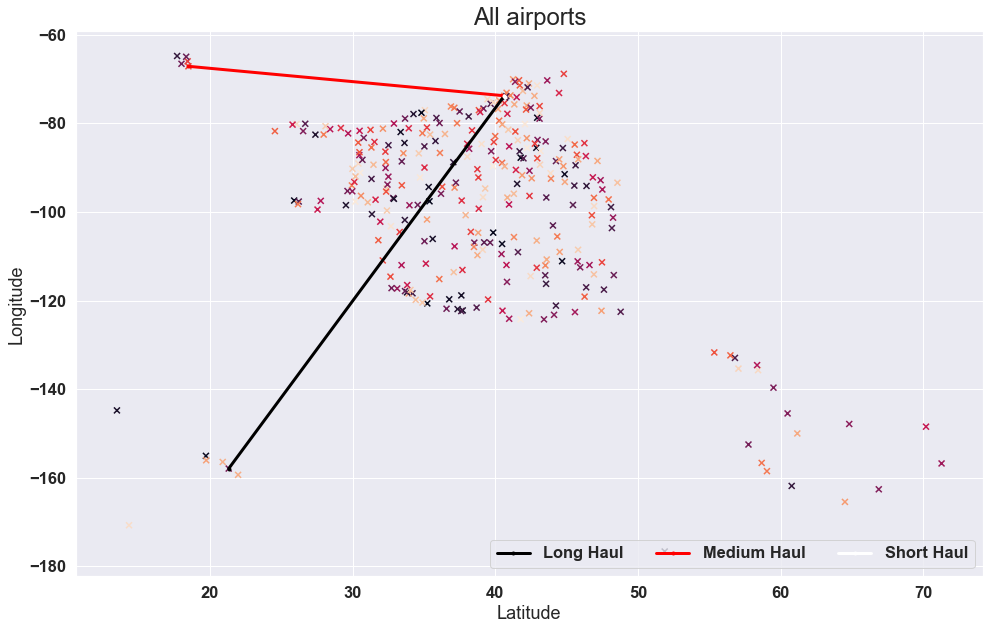

In [44]:
latitude=airp['LATITUDE']
longitude=airp['LONGITUDE']

lat=latitude.to_list()
lon=longitude.to_list()

plt.figure()

colors = np.random.rand(len(lat))

plt.scatter(lat,lon, marker='x', c=colors)

plt.title('All airports', fontsize=24)
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=18)

plt.plot((21.318689,40.639751), ( -157.922409,-73.778931), marker='.',color='black',linewidth=3)#one of longest hauls
plt.plot((18.49486,40.639751), (-67.12944,-73.778931), marker = '.',color='red',linewidth=3)#one of medium hauls
plt.plot((40.692501,40.639751), (-74.168663,-73.778931), marker = '.',color='white',linewidth=3)#shortest haul

plt.legend(["Long Haul" ,"Medium Haul", "Short Haul"], ncol = 3 , loc = "lower right")
plt.tight_layout()
plt.savefig('10.png', dpi = 70)
plt.show()

DELAYS

In [45]:
values = [no_depdelayed.value_counts()[0],no_depdelayed.value_counts()[1]]
labels = ["<15 minutes", ">=15 minutes"]
colors = ['lightgreen','coral']
values_arr = [no_arrdelayed.value_counts()[0],no_arrdelayed.value_counts()[1]]

fig = make_subplots(1, 2,subplot_titles=['Departures', 'Arrivals'],specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=values, pull=[0, 0.1],textinfo = 'label+percent'),1,1)
fig.add_trace(go.Pie(labels=labels, values=values_arr, pull=[0, 0.1],textinfo = 'label+percent'),1,2)
fig.update_traces( textinfo='value', textfont_size=14,
                  marker=dict(colors=colors, line=dict(color='black', width=2)))
fig.update_layout(uniformtext_minsize=4, uniformtext_mode='hide', title_text='Flights Delayed', 
                  title_x = 0.5, legend_title='<b>Flights</b>',legend=dict(x=.45, y=0.6))
fig.write_image('11.png')

fig.show()

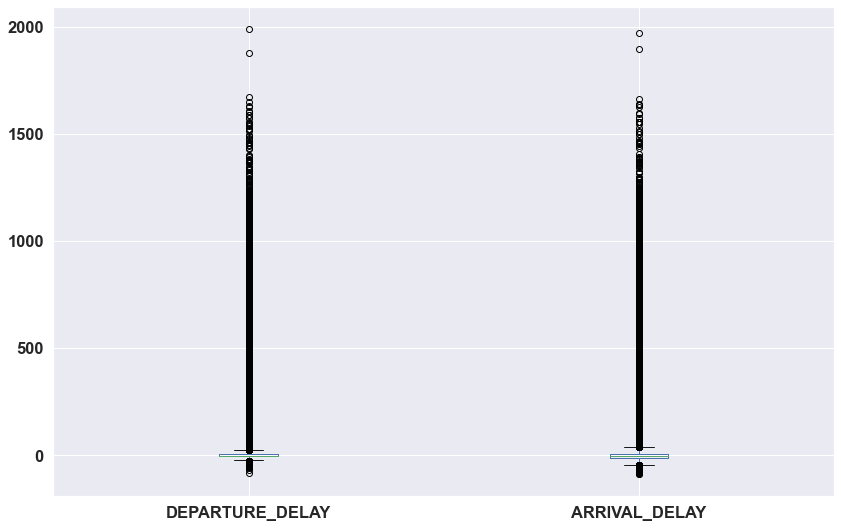

In [46]:
flights[['DEPARTURE_DELAY','ARRIVAL_DELAY']].plot.box()
plt.savefig('ahead.png', dpi = 70)
plt.show()

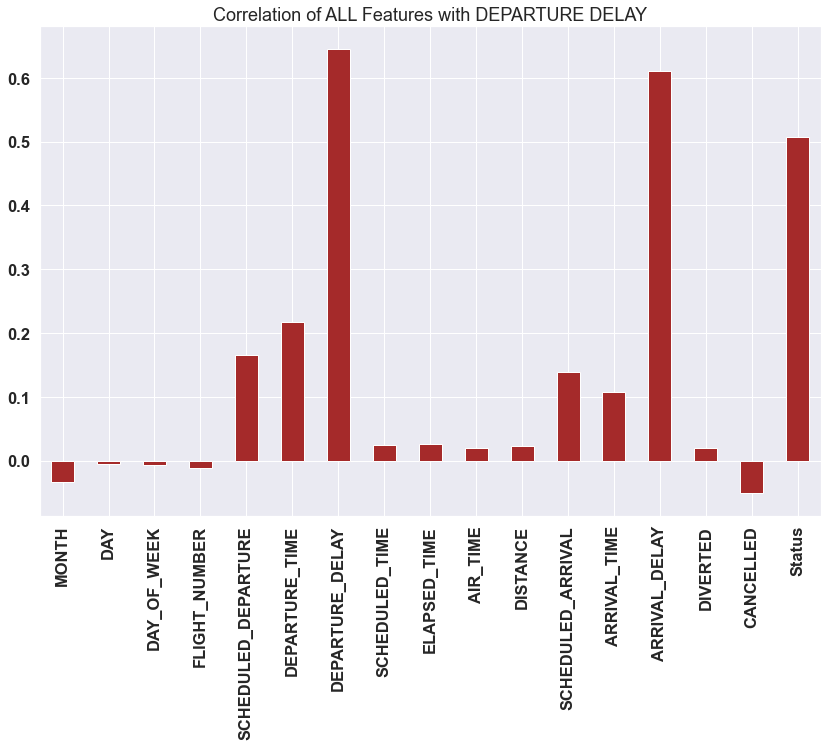

In [47]:
plt.figure()
flights.corrwith(no_depdelayed).plot(kind='bar',
                                            grid=True, title="Correlation of ALL Features with DEPARTURE DELAY", 
                                            color="brown")
plt.savefig('Corr of all features - depdel', dpi = 70)

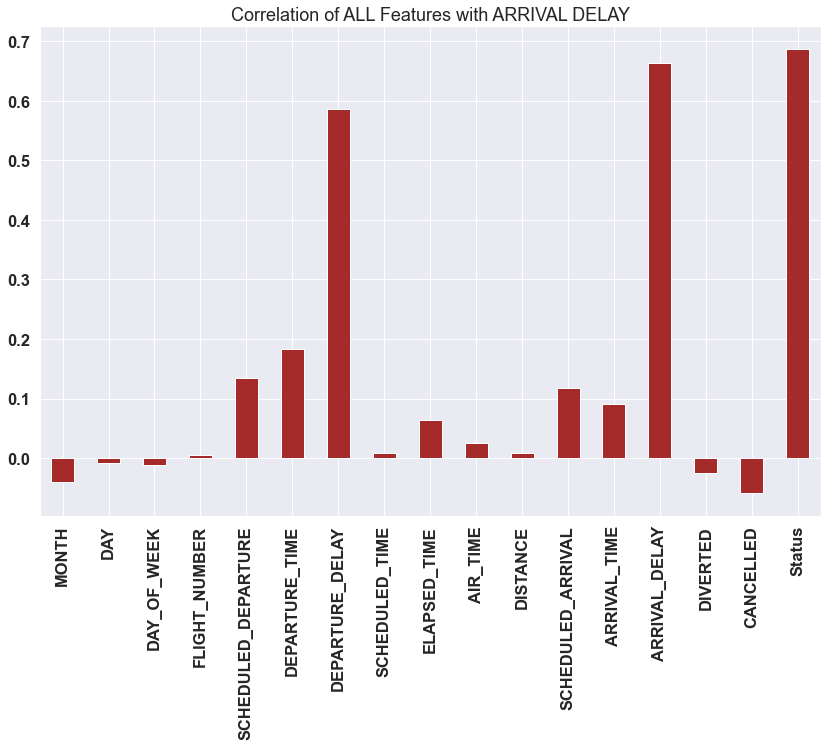

In [48]:
plt.figure()
flights.corrwith(no_arrdelayed).plot(kind='bar',
                                            grid=True, title="Correlation of ALL Features with ARRIVAL DELAY", 
                                            color="brown")
plt.savefig('Corr of all features - arr del', dpi = 70)

In [49]:
F=flights.groupby('AIRLINE').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',ascending=False).round(3)
trace1=go.Bar(x=F.index, y=F.DEPARTURE_DELAY ,name='DEPARTURE_DELAY', marker=dict(color='coral'))
F=flights.groupby('AIRLINE').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',ascending=False).round(3)
trace2=go.Bar(x=F.index, y=F.ARRIVAL_DELAY, name='ARRIVAL_DELAY', marker=dict(color='cadetblue'))
data=[trace1, trace2]
layout= go.Layout(xaxis=dict(tickangle=90),title='Mean Arrival & Departure Delay by Airlines', 
                  yaxis=dict(title='Minute'), barmode='stack')
fig=go.Figure(data=data, layout=layout)
fig.write_image('12.png')
pio.write_html(fig, file='12.html', auto_open=True)
plotly.io.write_json(fig, file='12.json') #trying to download animation
fig.show()

In [50]:
airport_mean_delays = pd.DataFrame(pd.Series(flights['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)
abbr_companies = airl.set_index('IATA_CODE')['AIRLINE'].to_dict()
identify_airport = airp.set_index('IATA_CODE')['CITY'].to_dict()
# function that extract statistical parameters from a grouby objet:

def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

for carrier in abbr_companies.keys():
    fg1 = flights[flights['AIRLINE'] == carrier]
    test = fg1['DEPARTURE_DELAY'].groupby(flights['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

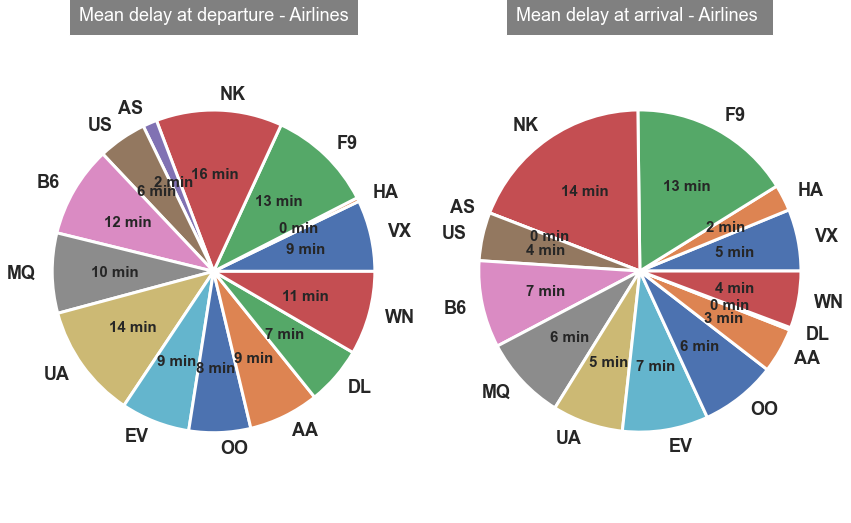

In [51]:
fg2 = flights.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
fg2['AIRLINE'] = fg2['AIRLINE'].replace(abbr_companies)
fig = plt.figure(1)
gs=GridSpec(1,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 

global_stats_d=flights['DEPARTURE_DELAY'].groupby(flights['AIRLINE']).apply(get_stats).unstack()
global_stats_d=global_stats_d.sort_values('count')

global_stats_a=flights['ARRIVAL_DELAY'].groupby(flights['AIRLINE']).apply(get_stats).unstack()
global_stats_a=global_stats_a.sort_values('count')

#----------------------------------------
# Pie chart nº1: mean delay at departure
#----------------------------------------
labels = [s for s in  global_stats_d.index]
sizes  = global_stats_d['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels = labels,shadow=False, startangle=0, 
                                    autopct=lambda p: '{:.0f} min '.format((p/100)*sum(sizes)),
                                    wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white' })
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(18)
    
ax1.axis('equal')
ax1.set_title('Mean delay at departure - Airlines', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)

#----------------------------------------
# Pie chart nº2: mean delay at arrival
#----------------------------------------
labels = [s for s in  global_stats_a.index]
sizes  = global_stats_a['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0,
                                     autopct=lambda p: '{:.0f} min'.format((p/100)*sum(sizes)),
                                    wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(18)
ax2.axis('equal')
ax2.set_title('Mean delay at arrival - Airlines ', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)
plt.savefig('13.png', dpi = 70)

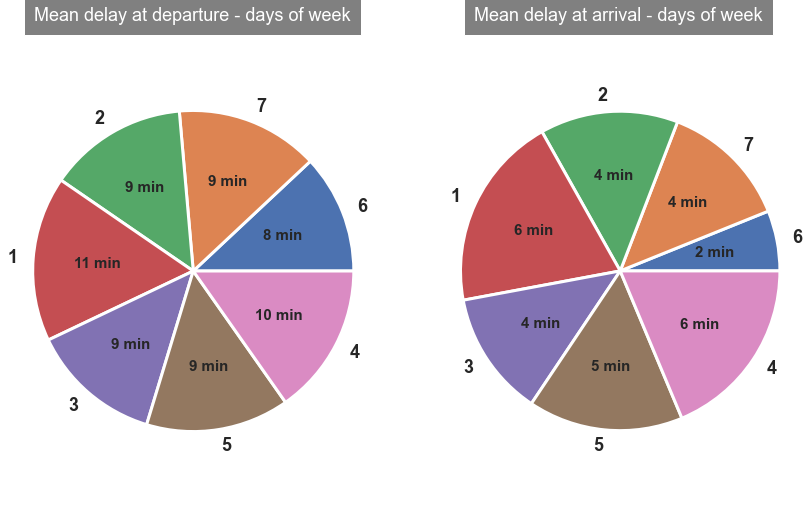

In [52]:

fig = plt.figure(1)
gs=GridSpec(1,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 

global_stats_d=flights['DEPARTURE_DELAY'].groupby(flights['DAY_OF_WEEK']).apply(get_stats).unstack()
global_stats_d=global_stats_d.sort_values('count')

global_stats_a=flights['ARRIVAL_DELAY'].groupby(flights['DAY_OF_WEEK']).apply(get_stats).unstack()
global_stats_a=global_stats_a.sort_values('count')

#----------------------------------------
# Pie chart nº1: mean delay at departure
#----------------------------------------
labels = [s for s in  global_stats_d.index]
sizes  = global_stats_d['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(7)]
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0, 
                                    autopct=lambda p: '{:.0f} min'.format((p/100)*sum(sizes)),
                                    wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(7): 
    texts[i].set_fontsize(18)
ax1.axis('equal')
ax1.set_title('Mean delay at departure - days of week', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)

#----------------------------------------
# Pie chart nº2: mean delay at arrival
#----------------------------------------
labels = [s for s in  global_stats_a.index]
sizes  = global_stats_a['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(7)]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0,
                                     autopct=lambda p: '{:.0f} min'.format((p/100)*sum(sizes)),
                                   wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(7): 
    texts[i].set_fontsize(18)
ax2.axis('equal')
ax2.set_title('Mean delay at arrival - days of week', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)
plt.savefig('14.png', dpi = 70)

In [53]:
F=flights.groupby('DAY_OF_WEEK').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',ascending=False).round(3)
trace1=go.Bar(x=F.index, y=F.DEPARTURE_DELAY ,name='DEPARTURE_DELAY', marker=dict(color='coral'))
F=flights.groupby('DAY_OF_WEEK').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',ascending=False).round(3)
trace2=go.Bar(x=F.index, y=F.ARRIVAL_DELAY, name='ARRIVAL_DELAY', marker=dict(color='cadetblue'))
data=[trace1, trace2]
layout= go.Layout(xaxis=dict(tickangle=90),title='Mean Arrival & Departure Delay by Days of Week', 
                  yaxis=dict(title='Minute'), barmode='stack')
fig=go.Figure(data=data, layout=layout)
fig.write_image('15.png')
pio.write_html(fig, file='15.html', auto_open=True)
plotly.io.write_json(fig, file='15.json')
fig.show()

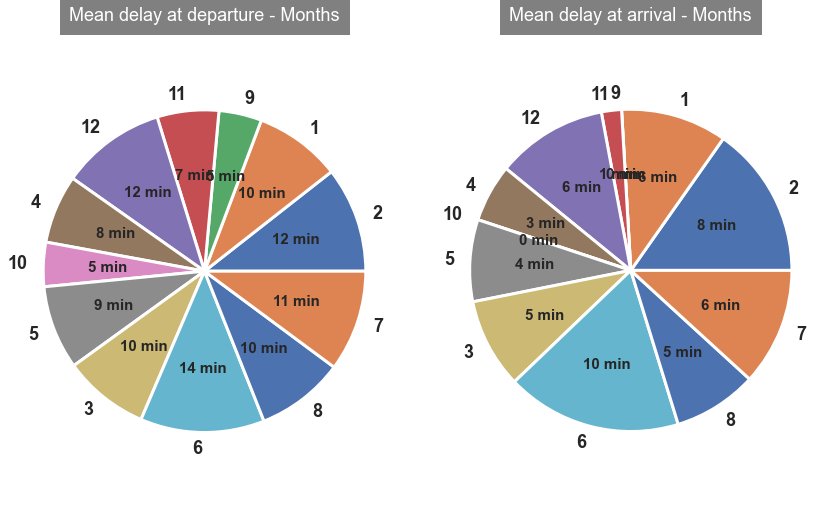

In [54]:
fig = plt.figure(1)
gs=GridSpec(1,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 

global_stats_d=flights['DEPARTURE_DELAY'].groupby(flights['MONTH']).apply(get_stats).unstack()
global_stats_d=global_stats_d.sort_values('count')

global_stats_a=flights['ARRIVAL_DELAY'].groupby(flights['MONTH']).apply(get_stats).unstack()
global_stats_a=global_stats_a.sort_values('count')

#----------------------------------------
# Pie chart nº1: mean delay at departure
#----------------------------------------
labels = [s for s in  global_stats_d.index]
sizes  = global_stats_d['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(12)]
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0, 
                                    autopct=lambda p: '{:.0f} min'.format((p/100)*sum(sizes)),
                                   wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(12): 
    texts[i].set_fontsize(18)
ax1.axis('equal')
ax1.set_title('Mean delay at departure - Months', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)

#----------------------------------------
# Pie chart nº2: mean delay at arrival
#----------------------------------------
labels = [s for s in  global_stats_a.index]
sizes  = global_stats_a['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(12)]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0,
                                     autopct=lambda p: '{:.0f} min'.format((p/100)*sum(sizes)),
                                   wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(12): 
    texts[i].set_fontsize(18)
ax2.axis('equal')
ax2.set_title('Mean delay at arrival - Months', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)
plt.savefig('16.png', dpi = 70)

In [55]:
F=flights.groupby('MONTH').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',ascending=False).round(3)
trace1=go.Bar(x=F.index, y=F.DEPARTURE_DELAY ,name='DEPARTURE_DELAY', marker=dict(color='coral'))
F=flights.groupby('MONTH').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',ascending=False).round(3)
trace2=go.Bar(x=F.index, y=F.ARRIVAL_DELAY, name='ARRIVAL_DELAY', marker=dict(color='cadetblue'))
data=[trace1, trace2]
layout= go.Layout(xaxis=dict(tickangle=90),title='Mean Arrival & Departure Delay by Months', 
                  yaxis=dict(title='Minute'), barmode='stack')
fig=go.Figure(data=data, layout=layout)
fig.write_image('17.png')
pio.write_html(fig, file='17.html', auto_open=True)
plotly.io.write_json(fig, file='17.json')
fig.show()

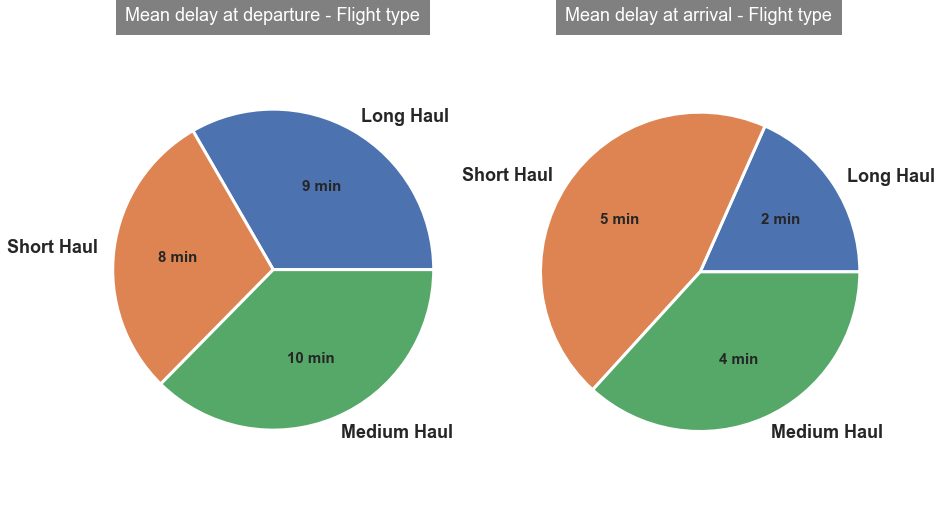

In [56]:
fig = plt.figure(1)
gs=GridSpec(1,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 

global_stats_d=flights['DEPARTURE_DELAY'].groupby(flights['FlightType']).apply(get_stats).unstack()
global_stats_d=global_stats_d.sort_values('count')

global_stats_a=flights['ARRIVAL_DELAY'].groupby(flights['FlightType']).apply(get_stats).unstack()
global_stats_a=global_stats_a.sort_values('count')

#----------------------------------------
# Pie chart nº1: mean delay at departure
#----------------------------------------
labels = [s for s in  global_stats_d.index]
sizes  = global_stats_d['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(3)]
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0, 
                                    autopct=lambda p: '{:.0f} min'.format((p/100)*sum(sizes)),
                                    wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(3): 
    texts[i].set_fontsize(18)
ax1.axis('equal')
ax1.set_title('Mean delay at departure - Flight type', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)

#----------------------------------------
# Pie chart nº2: mean delay at arrival
#----------------------------------------
labels = [s for s in  global_stats_a.index]
sizes  = global_stats_a['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(3)]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0,
                                     autopct=lambda p: '{:.0f} min'.format((p/100)*sum(sizes)),
                                   wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(3): 
    texts[i].set_fontsize(18)
ax2.axis('equal')
ax2.set_title('Mean delay at arrival - Flight type', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)
plt.savefig('18.png', dpi = 70)

In [57]:
F=flights.groupby('FlightType').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY',ascending=False).round(3)
trace1=go.Bar(x=F.index, y=F.DEPARTURE_DELAY ,name='DEPARTURE_DELAY', marker=dict(color='coral'))
F=flights.groupby('FlightType').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY',ascending=False).round(3)
trace2=go.Bar(x=F.index, y=F.ARRIVAL_DELAY, name='ARRIVAL_DELAY', marker=dict(color='cadetblue'))
data=[trace1, trace2]
layout= go.Layout(xaxis=dict(tickangle=90),title='Mean Arrival & Departure Delay by Flight type', 
                  yaxis=dict(title='Minute'), barmode='stack')
fig=go.Figure(data=data, layout=layout)
fig.write_image('19.png')
pio.write_html(fig, file='19.html', auto_open=True)
plotly.io.write_json(fig, file='19.json')
fig.show()

CANCELLED

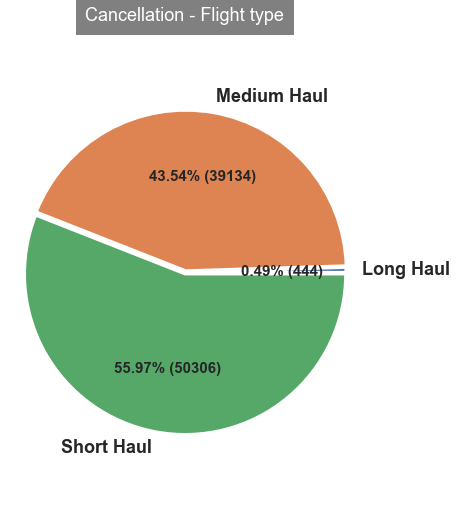

In [58]:
can=flights['CANCELLED'][flights['CANCELLED']!=0]
fig = plt.figure(1)
gs=GridSpec(1,2)             
ax1=fig.add_subplot(gs[0,0]) 

global_stats_d=can.groupby(flights['FlightType']).apply(get_stats).unstack()
global_stats_d=global_stats_d.sort_values('count')
#----------------------------------------
# Pie chart: Cancellation
#----------------------------------------
labels = [s for s in  global_stats_d.index]
sizes  = global_stats_d['count'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(3)]
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0, 
                                    autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*sum(sizes)),
                                    wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(3): 
    texts[i].set_fontsize(18)
ax1.axis('equal')
ax1.set_title('Cancellation - Flight type', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)
plt.savefig('20.png', dpi = 70)

In [59]:
fig = plt.figure(1)
gs=GridSpec(1,2)             
ax1=fig.add_subplot(gs[0,0]) 
global_stats_d=can.groupby(flights['DAY_OF_WEEK']).apply(get_stats).unstack()
global_stats_d=global_stats_d.sort_values('count')
#----------------------------------------
# Pie chart: Cancellation
#----------------------------------------
labels = [s for s in  global_stats_d.index]
sizes  = global_stats_d['count'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(7)]
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0, 
                                    autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*sum(sizes)),
                                    wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(7): 
    texts[i].set_fontsize(18)
ax1.axis('equal')
ax1.set_title('Cancellation - Days of week', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)
plt.savefig('21.png', dpi = 70)

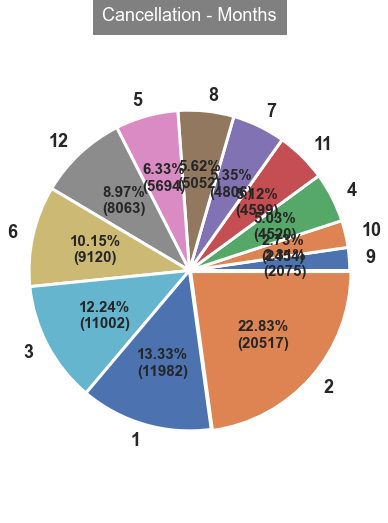

In [60]:
fig = plt.figure(1)
gs=GridSpec(1,2)             
ax1=fig.add_subplot(gs[0,0]) 
global_stats_d=can.groupby(flights['MONTH']).apply(get_stats).unstack()
global_stats_d=global_stats_d.sort_values('count')
#----------------------------------------
# Pie chart: Cancellation
#----------------------------------------
labels = [s for s in  global_stats_d.index]
sizes  = global_stats_d['count'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(12)]
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0, 
                                    autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*sum(sizes)), 
                                    wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(12): 
    texts[i].set_fontsize(18)
ax1.axis('equal')
ax1.set_title('Cancellation - Months', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)
plt.savefig('22.png', dpi = 70)

In [61]:
fg2 = flights.loc[:, ['AIRLINE', 'CANCELLED']]
fg2['AIRLINE'] = fg2['AIRLINE'].replace(abbr_companies)
fig = plt.figure(1)
gs=GridSpec(1,2)             
ax1=fig.add_subplot(gs[0,0]) 


global_stats_d=can.groupby(flights['AIRLINE']).apply(get_stats).unstack()
global_stats_d=global_stats_d.sort_values('count')


#----------------------------------------
# Pie chart : Cancellation
#----------------------------------------
labels = [s for s in  global_stats_d.index]
sizes  = global_stats_d['count'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0, 
                                    autopct=lambda p:  '{:.2f}%\n({:.0f})'.format(p,(p/100)*sum(sizes)),
                                    wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(18)
ax1.axis('equal')
ax1.set_title('Cancellation - Airlines', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)
plt.savefig('23.png', dpi = 70)

DIVERTED

In [62]:
fg2 = flights.loc[:, ['AIRLINE', 'DIVERTED']]
div=flights['DIVERTED'][flights['DIVERTED']!=0]
fg2['AIRLINE'] = fg2['AIRLINE'].replace(abbr_companies)
fig = plt.figure(1)
gs=GridSpec(1,2)             
ax1=fig.add_subplot(gs[0,0]) 


global_stats_d=div.groupby(flights['AIRLINE']).apply(get_stats).unstack()
global_stats_d=global_stats_d.sort_values('count')


#----------------------------------------
# Pie chart : Divertion
#----------------------------------------
labels = [s for s in  global_stats_d.index]
sizes  = global_stats_d['count'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0, 
                                    autopct=lambda p:  '{:.2f}%\n({:.0f})'.format(p,(p/100)*sum(sizes)),
                                    wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(18)
ax1.axis('equal')
ax1.set_title('Diverted - Airlines', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)
plt.savefig('24.png', dpi = 70)

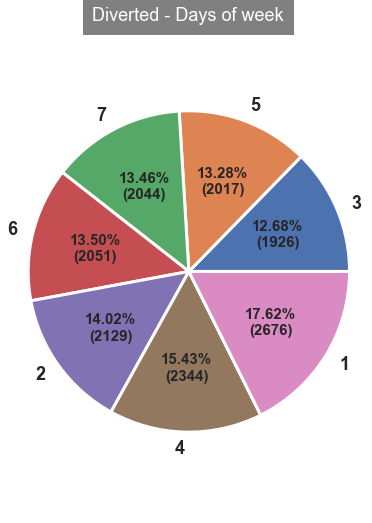

In [63]:
fig = plt.figure(1)
gs=GridSpec(1,2)             
ax1=fig.add_subplot(gs[0,0]) 
global_stats_d=div.groupby(flights['DAY_OF_WEEK']).apply(get_stats).unstack()
global_stats_d=global_stats_d.sort_values('count')
#----------------------------------------
# Pie chart: Divertion
#----------------------------------------
labels = [s for s in  global_stats_d.index]
sizes  = global_stats_d['count'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(7)]
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0, 
                                    autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*sum(sizes)),
                                    wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(7): 
    texts[i].set_fontsize(18)
ax1.axis('equal')
ax1.set_title('Diverted - Days of week', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)
plt.savefig('25.png', dpi = 70)

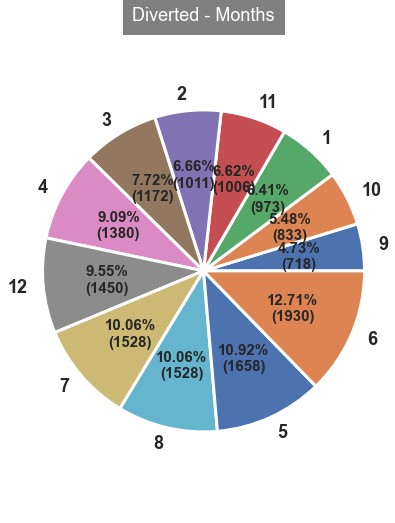

In [64]:
fig = plt.figure(1)
gs=GridSpec(1,2)             
ax1=fig.add_subplot(gs[0,0]) 
global_stats_d=div.groupby(flights['MONTH']).apply(get_stats).unstack()
global_stats_d=global_stats_d.sort_values('count')
#----------------------------------------
# Pie chart: Divertion
#----------------------------------------
labels = [s for s in  global_stats_d.index]
sizes  = global_stats_d['count'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(12)]
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0, 
                                    autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*sum(sizes)), 
                                    wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(12): 
    texts[i].set_fontsize(18)
ax1.axis('equal')
ax1.set_title('Diverted - Months', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)
plt.savefig('26.png', dpi = 70)

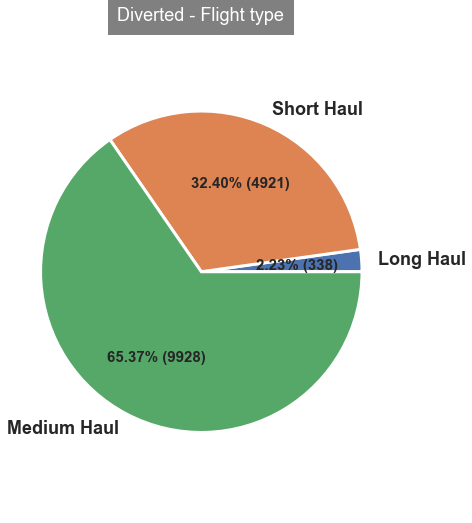

In [65]:
fig = plt.figure(1)
gs=GridSpec(1,2)             
ax1=fig.add_subplot(gs[0,0]) 

global_stats_d=div.groupby(flights['FlightType']).apply(get_stats).unstack()
global_stats_d=global_stats_d.sort_values('count')
#----------------------------------------
# Pie chart: Divertion
#----------------------------------------
labels = [s for s in  global_stats_d.index]
sizes  = global_stats_d['count'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(3)]
patches, texts, autotexts = ax1.pie(sizes, explode = explode, labels = labels, shadow=False, startangle=0, 
                                    autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*sum(sizes)),
                                    wedgeprops = { 'linewidth' : 3,'edgecolor' : 'white'})
for i in range(3): 
    texts[i].set_fontsize(18)
ax1.axis('equal')
ax1.set_title('Diverted - Flight type', bbox={'facecolor':'grey', 'pad':10},
              color='w', fontsize=18)
plt.savefig('27.png', dpi = 70)